# Introduction

In ecommerce companies like online retails, customer segmentation is necessary in order to understand customers behaviors. It leverages aqcuired customer data like the one we have in our case, **transactions data** in order to divide customers into groups. 

Our goal in this Notebook is to cluster our customers to get insights in:
- Increasing **revenue** (Knowing customers who present most of our revenue)
- Increasing customer **retention**
- Discovering **Trends and patterns** 
- Defining **customers at risk**

We will do **RFM Analysis** as a first step and then **combine RFM with predictive algorithms (k-means)**. 

RFM Analysis answers these questions:
- Who are our best customers?
- Who has the potential to be converted in more profitable customers?
- Which customers we must retain?
- Which group of customers is most likely to respond to our current campaign?


# Import modules

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from warnings import filterwarnings
filterwarnings('ignore')

In [3]:
#load the dataset

df = pd.read_excel("Online Retail.xlsx")
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


## Attribute Information:

InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation. <br>
StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.<br>
Description: Product (item) name. Nominal.<br>
Quantity: The quantities of each product (item) per transaction. Numeric.<br>
InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated.<br>
UnitPrice: Unit price. Numeric, Product price per unit in sterling.<br>
CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.<br>
Country: Country name. Nominal, the name of the country where each customer resides.<br>

In [4]:
# customer segmentation is performed on available data (remove the data where the transactions were cancelled or returned)

In [8]:
#shape of the data
df.shape

(541909, 8)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [9]:
print('Number of unique invoice available :', df['InvoiceNo'].nunique())

Number of unique invoice available : 25900


In [21]:
print('Number of unique stock code available :', df['StockCode'].nunique())

Number of unique stock code available : 4070


In [24]:
df['Quantity'].describe()

#the minimum quantity is a negative value ==> which is not possible we can check that further and rectify

count    541909.000000
mean          9.552250
std         218.081158
min      -80995.000000
25%           1.000000
50%           3.000000
75%          10.000000
max       80995.000000
Name: Quantity, dtype: float64

In [29]:
df['InvoiceDate'].min(), df['InvoiceDate'].max()

#dataset contains data from 1st December 2010 to 9th December 2011
#one year data

(Timestamp('2010-12-01 08:26:00'), Timestamp('2011-12-09 12:50:00'))

In [31]:
df['UnitPrice'].describe()

#Unitprice is also in negative, we can further check and rectify

count    541909.000000
mean          4.611114
std          96.759853
min      -11062.060000
25%           1.250000
50%           2.080000
75%           4.130000
max       38970.000000
Name: UnitPrice, dtype: float64

In [33]:
print('Number of unique stock code available :', df['CustomerID'].nunique())

#there are 4372 unique customer data available

Number of unique stock code available : 4372


In [35]:
print('Number of unique stock code available :', df['Country'].nunique())

#there are around 38 countries, we can check the country wise customer coun

Number of unique stock code available : 38


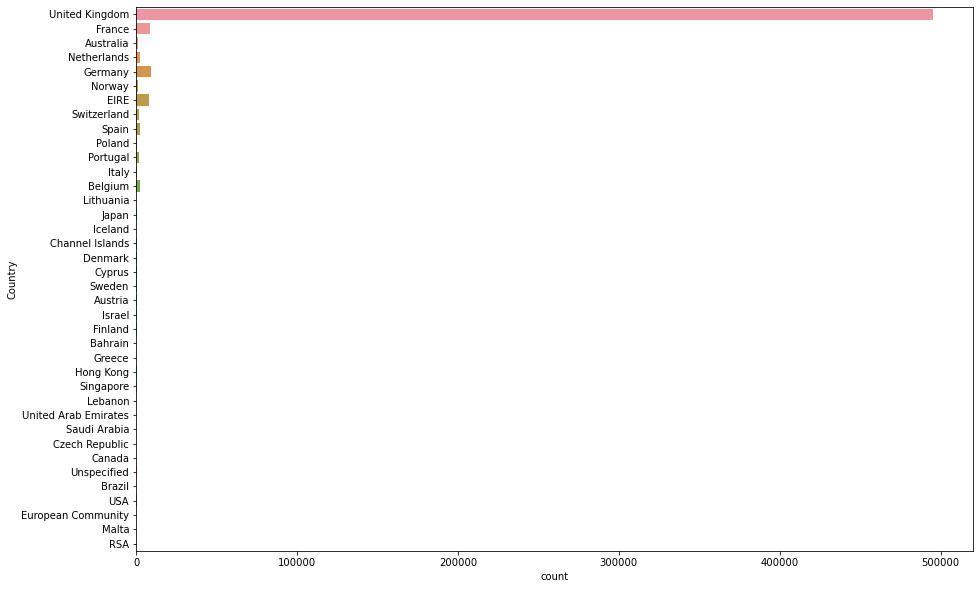

In [38]:
plt.figure(figsize=(15,10))
sns.countplot(data=df, y='Country')
plt.show()

In [42]:
df['Country'].value_counts(normalize=True) * 100

#Around 91.5% of the data are from customers in UK
# We can consider the UK data for further analysis

United Kingdom          91.431956
Germany                  1.752139
France                   1.579047
EIRE                     1.512431
Spain                    0.467422
Netherlands              0.437527
Belgium                  0.381798
Switzerland              0.369435
Portugal                 0.280305
Australia                0.232327
Norway                   0.200403
Italy                    0.148180
Channel Islands          0.139876
Finland                  0.128250
Cyprus                   0.114779
Sweden                   0.085254
Unspecified              0.082302
Austria                  0.073998
Denmark                  0.071783
Japan                    0.066063
Poland                   0.062926
Israel                   0.054806
USA                      0.053699
Hong Kong                0.053145
Singapore                0.042258
Iceland                  0.033585
Canada                   0.027864
Greece                   0.026942
Malta                    0.023436
United Arab Em

In [50]:
df[df['Country'] == 'United Kingdom']['CustomerID'].nunique()

# total customers 4372 - 3950, there is no much loss of the data
#only in UK there are around 3950, where other 37 countries customers are 400, therefore we will consider only UK data

3950

### UK data

In [52]:
df = df[df['Country'] == 'United Kingdom']

In [53]:
df.shape

(495478, 8)

In [54]:
df_copy = df.copy()

In [80]:
#as we are considering only one country we can delete COUNTRY column

df.drop('Country', axis=1, inplace=True)

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 495478 entries, 0 to 541893
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    495478 non-null  object        
 1   StockCode    495478 non-null  object        
 2   Description  494024 non-null  object        
 3   Quantity     495478 non-null  int64         
 4   InvoiceDate  495478 non-null  datetime64[ns]
 5   UnitPrice    495478 non-null  float64       
 6   CustomerID   361878 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 30.2+ MB


In [82]:
# Null value

df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     133600
dtype: int64

In [83]:
#percentage of null values
df.isnull().sum() / df.shape[0] * 100

#there are more null values in CustomerID, we cannot impute any value to that because it's mnipulating the data

InvoiceNo       0.000000
StockCode       0.000000
Description     0.293454
Quantity        0.000000
InvoiceDate     0.000000
UnitPrice       0.000000
CustomerID     26.963861
dtype: float64

In [84]:
#we will drop those rows with null value

df.dropna(subset=['CustomerID'], inplace=True)

In [85]:
df.shape

(361878, 7)

In [86]:
#Null values after dropping those rows
df.isnull().sum()

#all the null values have been removed

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
dtype: int64

In [87]:
# we have to remove data where the products were returned or cancelled
#Invoice starts with 'C'
# Negative quantity
# negative Unitprice

In [88]:
#We can remove the Invoice starting with 'C'

df[df['InvoiceNo'].str.startswith('C', na=False)]
#7533 transactions has been cancelled

df = df[~df['InvoiceNo'].str.startswith('C', na=False)]

df.shape

(354345, 7)

In [91]:
#check whether there any negative quantity or unit price

df[['Quantity', 'UnitPrice']].describe()

#there are no negative values but the unit price for some products are 0
#its not possible or might be given in discounts
# we can consider only the products purchased and not the products given for free

,Quantity,UnitPrice
count,354345.000000,354345.000000
mean,12.048913,2.963793
std,190.428127,17.862067
min,1.000000,0.000000
25%,2.000000,1.250000
50%,4.000000,1.950000
75%,12.000000,3.750000
max,80995.000000,8142.750000


In [100]:
df = df[~(df['UnitPrice'] == 0)]
df.shape

(354321, 7)

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 354321 entries, 0 to 541893
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    354321 non-null  object        
 1   StockCode    354321 non-null  object        
 2   Description  354321 non-null  object        
 3   Quantity     354321 non-null  int64         
 4   InvoiceDate  354321 non-null  datetime64[ns]
 5   UnitPrice    354321 non-null  float64       
 6   CustomerID   354321 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 21.6+ MB


In [110]:
df[df.duplicated() == True].shape

#There are 5118 dupicated values but we are not gonna remove those because there might be chances that instead of adding 
# the product in quantity they might have added a new transaction

(5118, 7)

In [111]:
df.shape

(354321, 7)

In [115]:
df = df[df['InvoiceDate'] >= '2010-12-09']

df.shape

(342454, 7)

# RFM Analysis

RFM (**Recency, Frequency, Monetary**) analysis is a customer segmentation technique that uses past purchase **behavior** to divide customers into groups. <br> RFM helps divide customers into various categories or clusters to identify customers who are more likely to respond to promotions and also for future personalization services.
- RECENCY (R): Days since last purchase 
- FREQUENCY (F): Total number of purchases 
- MONETARY VALUE (M): Total money this customer spent.

We will create those 3 customer attributes for each customer.


## Recency


To calculate recency, we need to choose a date point from which we evaluate **how many days ago was the customer's last purchase**.

In [121]:
max_date = df['InvoiceDate'].max()
max_date

Timestamp('2011-12-09 12:49:00')

In [124]:
rfm_df = df.groupby('CustomerID', as_index=False)['InvoiceDate'].max()

rfm_df.head()

,CustomerID,InvoiceDate
0,12346.0,2011-01-18 10:01:00
1,12747.0,2011-12-07 14:34:00
2,12748.0,2011-12-09 12:20:00
3,12749.0,2011-12-06 09:56:00
4,12820.0,2011-12-06 15:12:00


In [127]:
#we can find out the recency by subtracting it with the max date

(rfm_df['InvoiceDate'] - max_date)

0      -326 days +21:12:00
1        -2 days +01:45:00
2        -1 days +23:31:00
3        -4 days +21:07:00
4        -3 days +02:23:00
               ...        
3857   -278 days +21:03:00
3858   -181 days +22:04:00
3859     -8 days +22:54:00
3860     -4 days +23:13:00
3861    -43 days +20:40:00
Name: InvoiceDate, Length: 3862, dtype: timedelta64[ns]

In [129]:
rfm_df['Recency']  = rfm_df['InvoiceDate'].apply(lambda x: (max_date - x).days)

In [130]:
rfm_df.head()

,CustomerID,InvoiceDate,Recency
0,12346.0,2011-01-18 10:01:00,325
1,12747.0,2011-12-07 14:34:00,1
2,12748.0,2011-12-09 12:20:00,0
3,12749.0,2011-12-06 09:56:00,3
4,12820.0,2011-12-06 15:12:00,2


In [132]:
#we can drop invoice date columns

rfm_df.drop('InvoiceDate', axis=1, inplace=True)

## Frequency

Frequency helps us to know **how many times a customer purchased from us**. To do that we need to check how many invoices are registered by the same customer.

In [144]:
rfm_df['Frequency'] = df.groupby(['CustomerID'], as_index=False)['InvoiceNo'].nunique()['InvoiceNo']

In [145]:
rfm_df.head()

,CustomerID,Recency,Frequency
0,12346.0,325,1
1,12747.0,1,10
2,12748.0,0,195
3,12749.0,3,5
4,12820.0,2,4


## Monetary

Monetary attribute answers the question: **How much money did the customer spent over time?**

To do that, first, we will create a new column total cost to have the total price per invoice.

In [146]:
df['Total_amount'] = df['UnitPrice'] * df['Quantity']

In [158]:
rfm_df['Monetary'] = df.groupby('CustomerID', as_index=False)['Total_amount'].sum()['Total_amount']

In [160]:
rfm_df.head()

,CustomerID,Recency,Frequency,Monetary
0,12346.0,325,1,77183.60
1,12747.0,1,10,3837.45
2,12748.0,0,195,31854.58
3,12749.0,3,5,4090.88
4,12820.0,2,4,942.34


In [161]:
df[df['CustomerID'] == 12346]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Total_amount
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346.0,77183.6


## Customer segments with RFM Model

Before moving to customer segments, Let's see the application of Pareto Principle – commonly referred to as the 80-20 rule on our dataset by applying it to our RFM variables.

Pareto’s rule says **80% of the results come from 20% of the causes**.

Similarly, **20% customers contribute to 80% of your total revenue**. Let's verify that because that will help us know which customers to focus on when marketing new products.

### Applying 80-20 rule

In [169]:
#get the 80% of the revenue
pareto_cutoff = rfm_df['Monetary'].sum() * 0.8
print("The 80% of total revenue is: ",round(pareto_cutoff,2))

The 80% of total revenue is:  5646700.09


In [170]:
customers_rank = rfm_df
# Create a new column that is the rank of the value of coverage in ascending order
customers_rank['Rank'] = customers_rank['Monetary'].rank(ascending=0)
#customers_rank.drop('RevenueRank',axis=1,inplace=True)
customers_rank.head()

,CustomerID,Recency,Frequency,Monetary,Rank
0,12346.0,325,1,77183.60,5.0
1,12747.0,1,10,3837.45,309.0
2,12748.0,0,195,31854.58,25.0
3,12749.0,3,5,4090.88,282.0
4,12820.0,2,4,942.34,1478.0


### Top Customers

In [171]:
customers_rank.sort_values('Rank',ascending=True)

,CustomerID,Recency,Frequency,Monetary,Rank
3728,18102.0,0,57,233736.93,1.0
3271,17450.0,7,44,192521.95,2.0
2566,16446.0,0,2,168472.50,3.0
3313,17511.0,2,29,87591.70,4.0
0,12346.0,325,1,77183.60,5.0
...,...,...,...,...,...
2872,16878.0,83,1,13.30,3858.0
3630,17956.0,248,1,12.75,3859.0
2572,16454.0,44,2,6.90,3860.0
1384,14792.0,63,1,6.20,3861.0


In [172]:
#get top 20% of the customers
top_20_cutoff = 3863 *20 /100
top_20_cutoff

772.6

In [173]:
#sum the monetary values over the customer with rank <=773
revenueByTop20 = customers_rank[customers_rank['Rank'] <= 772]['Monetary'].sum()
revenueByTop20

5158179.371000001

In our case, the 80% of total revenue is not achieved by the 20% of TOP customers but approximately, it does, because they are less than our 20% TOP customers who achieve it. It would be interesting to study this group of customers because they are those who make our most revenue.

### Applying RFM score formula

The simplest way to create customers segments from RFM Model is to use **Quartiles**. We assign a score from 1 to 4 to Recency, Frequency and Monetary. Four is the best/highest value, and one is the lowest/worst value. A final RFM score is calculated simply by combining individual RFM score numbers.

Note: Quintiles (score from 1-5) offer better granularity, in case the business needs that but it will be more challenging to create segments since we will have 5*5*5 possible combinations. So, we will use quartiles.

#### RFM Quartiles

In [176]:
quantiles = rfm_df.quantile(q=[0.25,0.5,0.75])
quantiles.drop('CustomerID', axis=1, inplace=True)

In [177]:
quantiles.to_dict()

{'Recency': {0.25: 16.0, 0.5: 49.0, 0.75: 133.0},
 'Frequency': {0.25: 1.0, 0.5: 2.0, 0.75: 5.0},
 'Monetary': {0.25: 296.7125, 0.5: 642.605, 0.75: 1554.9049999999993},
 'Rank': {0.25: 966.25, 0.5: 1931.5, 0.75: 2896.75}}

#### Creation of RFM segmentation table

We will create two segmentation classes since, high recency is bad, while high frequency and monetary value is good.

In [178]:
# Arguments (x = value, p = recency, monetary_value, frequency, d = quartiles dict)
def RScore(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1
# Arguments (x = value, p = recency, monetary_value, frequency, k = quartiles dict)
def FMScore(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4

In [179]:
#create rfm segmentation table
rfm_segmentation = rfm_df
rfm_segmentation['R_Quartile'] = rfm_segmentation['Recency'].apply(RScore, args=('Recency',quantiles,))
rfm_segmentation['F_Quartile'] = rfm_segmentation['Frequency'].apply(FMScore, args=('Frequency',quantiles,))
rfm_segmentation['M_Quartile'] = rfm_segmentation['Monetary'].apply(FMScore, args=('Monetary',quantiles,))

In [180]:
rfm_segmentation.head()

,CustomerID,Recency,Frequency,Monetary,Rank,R_Quartile,F_Quartile,M_Quartile
0,12346.0,325,1,77183.60,5.0,1,1,4
1,12747.0,1,10,3837.45,309.0,4,4,4
2,12748.0,0,195,31854.58,25.0,4,4,4
3,12749.0,3,5,4090.88,282.0,4,3,4
4,12820.0,2,4,942.34,1478.0,4,3,3


Now that we have the score of each customer, we can represent our customer segmentation.<br>
First, we need to combine the scores (R_Quartile, F_Quartile,M_Quartile) together.

In [181]:
rfm_segmentation['RFMScore'] = rfm_segmentation.R_Quartile.map(str) \
                            + rfm_segmentation.F_Quartile.map(str) \
                            + rfm_segmentation.M_Quartile.map(str)
rfm_segmentation.head()

,CustomerID,Recency,Frequency,Monetary,Rank,R_Quartile,F_Quartile,M_Quartile,RFMScore
0,12346.0,325,1,77183.60,5.0,1,1,4,114
1,12747.0,1,10,3837.45,309.0,4,4,4,444
2,12748.0,0,195,31854.58,25.0,4,4,4,444
3,12749.0,3,5,4090.88,282.0,4,3,4,434
4,12820.0,2,4,942.34,1478.0,4,3,3,433


Best Recency score = 4: most recently purchase.
Best Frequency score = 4: most quantity purchase.
Best Monetary score = 4: spent the most.

Let's see who are our **Champions** (best customers).

In [182]:
rfm_segmentation[rfm_segmentation['RFMScore']=='444'].sort_values('Monetary', ascending=False).head(10)

,CustomerID,Recency,Frequency,Monetary,Rank,R_Quartile,F_Quartile,M_Quartile,RFMScore
3728,18102.0,0,57,233736.93,1.0,4,4,4,444
3271,17450.0,7,44,192521.95,2.0,4,4,4,444
3313,17511.0,2,29,87591.70,4.0,4,4,4,444
2730,16684.0,3,28,66653.56,7.0,4,4,4,444
893,14096.0,3,17,65164.79,8.0,4,4,4,444
614,13694.0,3,49,64197.50,9.0,4,4,4,444
1751,15311.0,0,88,59416.19,10.0,4,4,4,444
3625,17949.0,0,44,57196.48,11.0,4,4,4,444
2086,15769.0,6,25,56160.92,12.0,4,4,4,444
188,13089.0,2,94,55595.21,13.0,4,4,4,444


We can find [here](http://www.blastam.com/blog/rfm-analysis-boosts-sales) a suggestion of key segments and then we can decide which segment to consider for further study.

**Note:** the suggested link use the opposite valuation: 1 as highest/best score and 4 is the lowest.

**How many customers do we have in each segment?**

In [183]:
print("Best Customers: ",len(rfm_segmentation[rfm_segmentation['RFMScore']=='444']))
print('Loyal Customers: ',len(rfm_segmentation[rfm_segmentation['F_Quartile']==4]))
print("Big Spenders: ",len(rfm_segmentation[rfm_segmentation['M_Quartile']==4]))
print('Almost Lost: ', len(rfm_segmentation[rfm_segmentation['RFMScore']=='244']))
print('Lost Customers: ',len(rfm_segmentation[rfm_segmentation['RFMScore']=='144']))
print('Lost Cheap Customers: ',len(rfm_segmentation[rfm_segmentation['RFMScore']=='111']))

Best Customers:  399
Loyal Customers:  752
Big Spenders:  966
Almost Lost:  60
Lost Customers:  10
Lost Cheap Customers:  390


Now that we knew our customers segments we can choose how to target or deal with each segment.

For example:

**Best Customers - Champions**: Reward them. They can be early adopters to new products. Suggest them "Refer a friend".

**At Risk**: Send them personalized emails to encourage them to shop.

More ideas about what actions to perform in [Ometria](http://54.73.114.30/customer-segmentation#).

### Conclusion - perspective from this level of customer segmentation
To gain even further insight into customer behavior, we can dig deeper in the relationship between RFM variables.  

RFM model can be used in conjunction with certain predictive models like **k-means clustering**, **Logistic Regression** and **Recommendation** to produce better informative results on customer behavior.

We will go for k-means since it has been widely used for Market Segmentation and it offers the advantage of being simple to implement, following Andrew Ng who advice in his Machine Learning course, start with a dirty and simple model then move to more complex models because simple implementation helps having a first glance at the data and know where/how to exploit it better.

## Applying K-means clustering on RFM variables

### Preprocess Data

In [185]:
rfm_data = rfm_df.drop(['R_Quartile','F_Quartile','M_Quartile','RFMScore','Rank'],axis=1)
rfm_data.head()

,CustomerID,Recency,Frequency,Monetary
0,12346.0,325,1,77183.60
1,12747.0,1,10,3837.45
2,12748.0,0,195,31854.58
3,12749.0,3,5,4090.88
4,12820.0,2,4,942.34


In [188]:
rfm_data.index = rfm_data['CustomerID']

In [191]:
rfm_data = rfm_data.drop('CustomerID', axis=1, inplace=False)

In [192]:
rfm_data.head()

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,325,1,77183.60
12747.0,1,10,3837.45
12748.0,0,195,31854.58
12749.0,3,5,4090.88
12820.0,2,4,942.34


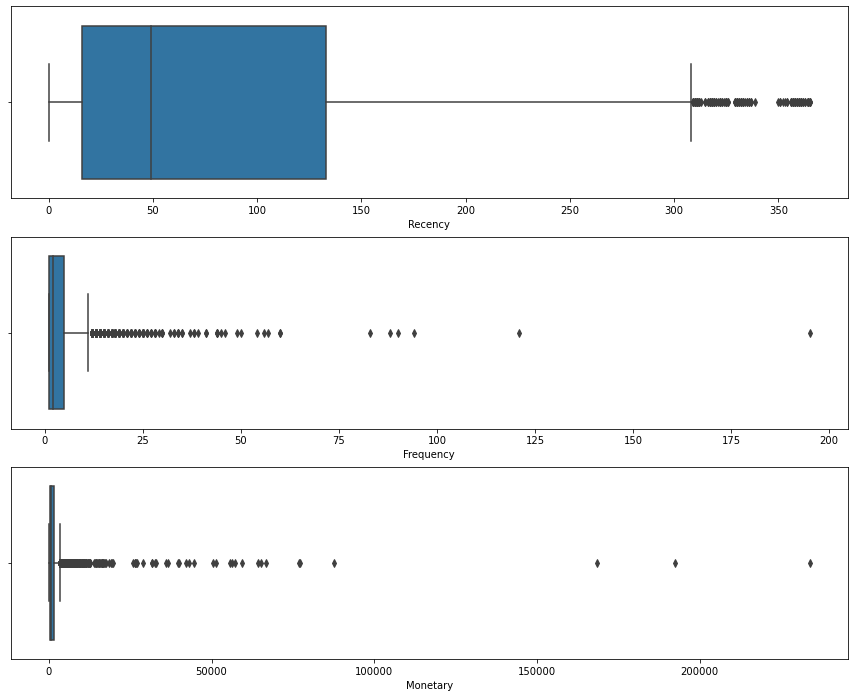

In [201]:
#check for outliers
fig, ax = plt.subplots(3, 1, figsize=(15,12))

sns.boxplot(rfm_data['Recency'], ax= ax[0] )
sns.boxplot(rfm_data['Frequency'], ax=ax[1] )
sns.boxplot(rfm_data['Monetary'], ax=ax[2])

plt.show()

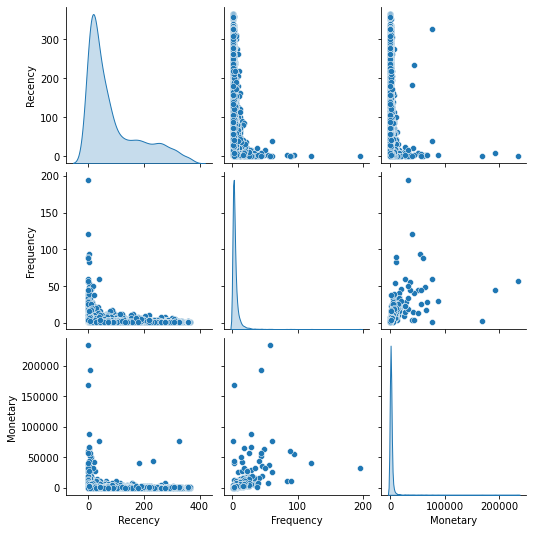

In [206]:
sns.pairplot(rfm_data, diag_kind='kde')

In [202]:
#instead of removing outliers, we can powertransform the data

from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()

In [207]:
features = rfm_data.columns

In [209]:
rfm_data_pt = pd.DataFrame(pt.fit_transform(rfm_data), columns=features, index=rfm_data.index)

In [210]:
rfm_data_pt.describe()

,Recency,Frequency,Monetary
count,3.862000e+03,3.862000e+03,3.862000e+03
mean,2.341077e-16,6.390538e-17,-8.206796e-16
std,1.000129e+00,1.000129e+00,1.000129e+00
min,-2.108539e+00,-1.148776e+00,-5.036243e+00
25%,-7.337593e-01,-1.148776e+00,-6.573261e-01
50%,5.238868e-03,-1.793735e-01,-2.056073e-03
75%,8.191072e-01,9.127950e-01,6.960813e-01
max,1.812498e+00,2.348790e+00,3.785663e+00


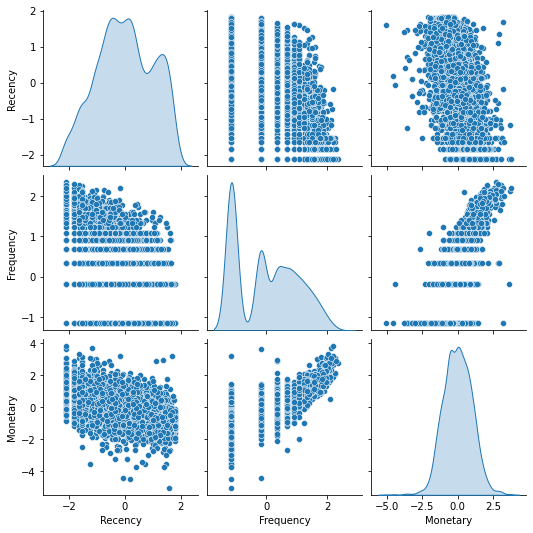

In [211]:
sns.pairplot(rfm_data_pt, diag_kind='kde')

### K-means Implementation

A common challenge with k-means is that you must tell it how many clusters you expect. Figuring out how many clusters we need is not obvious from data, thus we will try different clusters numbers and check their [silhouette coefficient](http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html). The silhouette coefficient for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). The [elbow](https://en.wikipedia.org/wiki/Determining_the_number_of_clusters_in_a_data_set#The_elbow_method) method can be used to determine the number of clusters as well.

**Note:** K-means is sensitive to initializations because those initializations are critical to quality of optima found. Thus, we will use smart initialization called ***k-means++***.

In [212]:
from sklearn.cluster import KMeans

In [214]:
#elbow method

cluster_errors = []

n_clusters = list(range(2,15))

for n in n_clusters:
    kmeans = KMeans(n_clusters=n, n_init=10)
    kmeans.fit(rfm_data_pt)
    cluster_errors.append(kmeans.inertia_)

df_elbow = pd.DataFrame({'No_cluster' : n_clusters, 'WCSS_errors' :cluster_errors })

In [215]:
df_elbow

,No_cluster,WCSS_errors
0,2,5460.290432
1,3,4203.788717
2,4,3302.980099
3,5,2781.717992
4,6,2419.944867
5,7,2193.406450
6,8,1993.838969
7,9,1825.009054
8,10,1685.353815
9,11,1576.393011


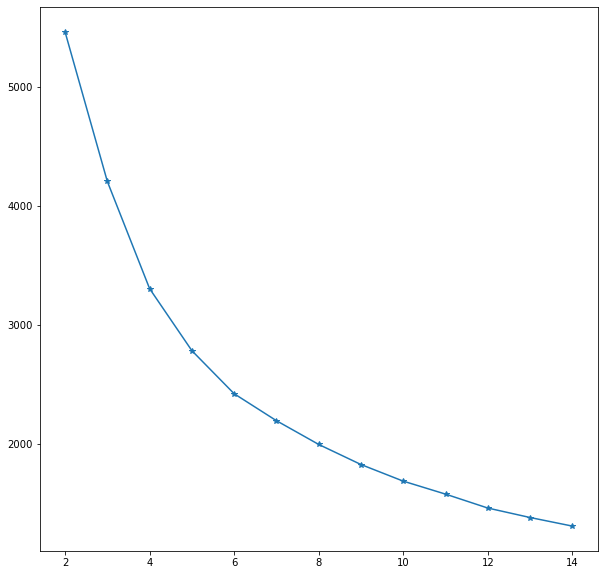

In [219]:
plt.figure(figsize=(10,10))
plt.plot(df_elbow['No_cluster'], df_elbow['WCSS_errors'], marker='*')

plt.show()

#we can consider n=3, we can recheck with sil

In [220]:
from sklearn.metrics import silhouette_score

In [221]:
#silhouette_score

sil_score = []

n_clusters = list(range(2,15))

for n in n_clusters:
    kmeans = KMeans(n_clusters=n, n_init=10)
    kmeans.fit(rfm_data_pt)
    labels = kmeans.labels_
    sil_score.append(silhouette_score(rfm_data_pt, labels ))

df_sil = pd.DataFrame({'No_cluster' : n_clusters, 'Silhouette_score' :sil_score })

In [223]:
df_sil

#we can consider n=2, silhouette_score is high for n=2

,No_cluster,Silhouette_score
0,2,0.435352
1,3,0.329070
2,4,0.334392
3,5,0.326477
4,6,0.324287
5,7,0.303571
6,8,0.297356
7,9,0.297817
8,10,0.298210
9,11,0.295414


In [224]:
#Clustering

kmeans = KMeans(n_clusters=2)
kmeans.fit(rfm_data_pt)

labels = kmeans.labels_

In [228]:
rfm_data_pt['K_labels'] = labels

In [229]:
rfm_data_pt.head()

,Recency,Frequency,Monetary,K_labels
CustomerID,,,,
12346.0,1.688654,-1.148776,3.213872,0
12747.0,-1.834272,1.489057,1.356792,0
12748.0,-2.108539,2.348790,2.715793,0
12749.0,-1.523331,0.912795,1.401631,0
12820.0,-1.657136,0.679616,0.306938,0


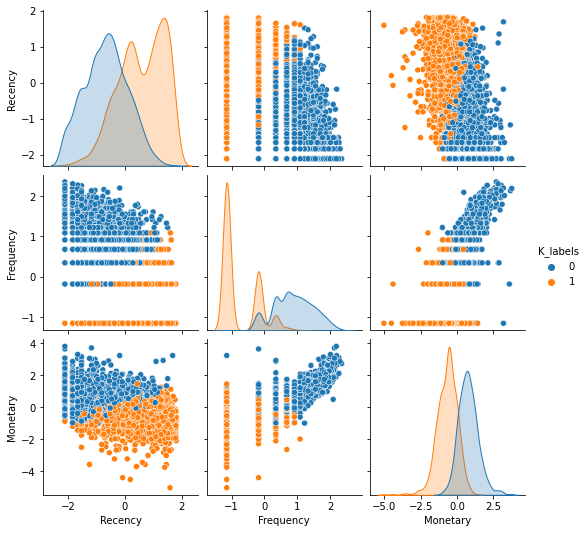

In [230]:
sns.pairplot(rfm_data_pt, hue='K_labels')

<AxesSubplot:xlabel='K_labels', ylabel='count'>

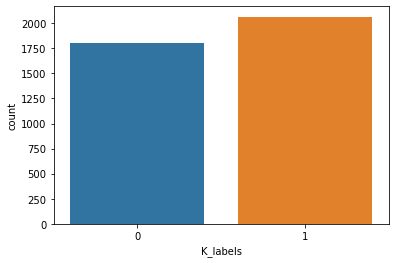

In [231]:
sns.countplot(rfm_data_pt['K_labels'])

### AgglomerativeClustering

In [242]:
X = rfm_data_pt.iloc[:, 0:3]
X.head()

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,1.688654,-1.148776,3.213872
12747.0,-1.834272,1.489057,1.356792
12748.0,-2.108539,2.348790,2.715793
12749.0,-1.523331,0.912795,1.401631
12820.0,-1.657136,0.679616,0.306938


In [232]:
from sklearn.cluster import AgglomerativeClustering 

In [243]:
model2 = AgglomerativeClustering(n_clusters=2, affinity='euclidean',  linkage='ward')

model2.fit(X)

AgglomerativeClustering()

In [245]:
rfm_data_pt['Aglo_Labels'] = model2.labels_

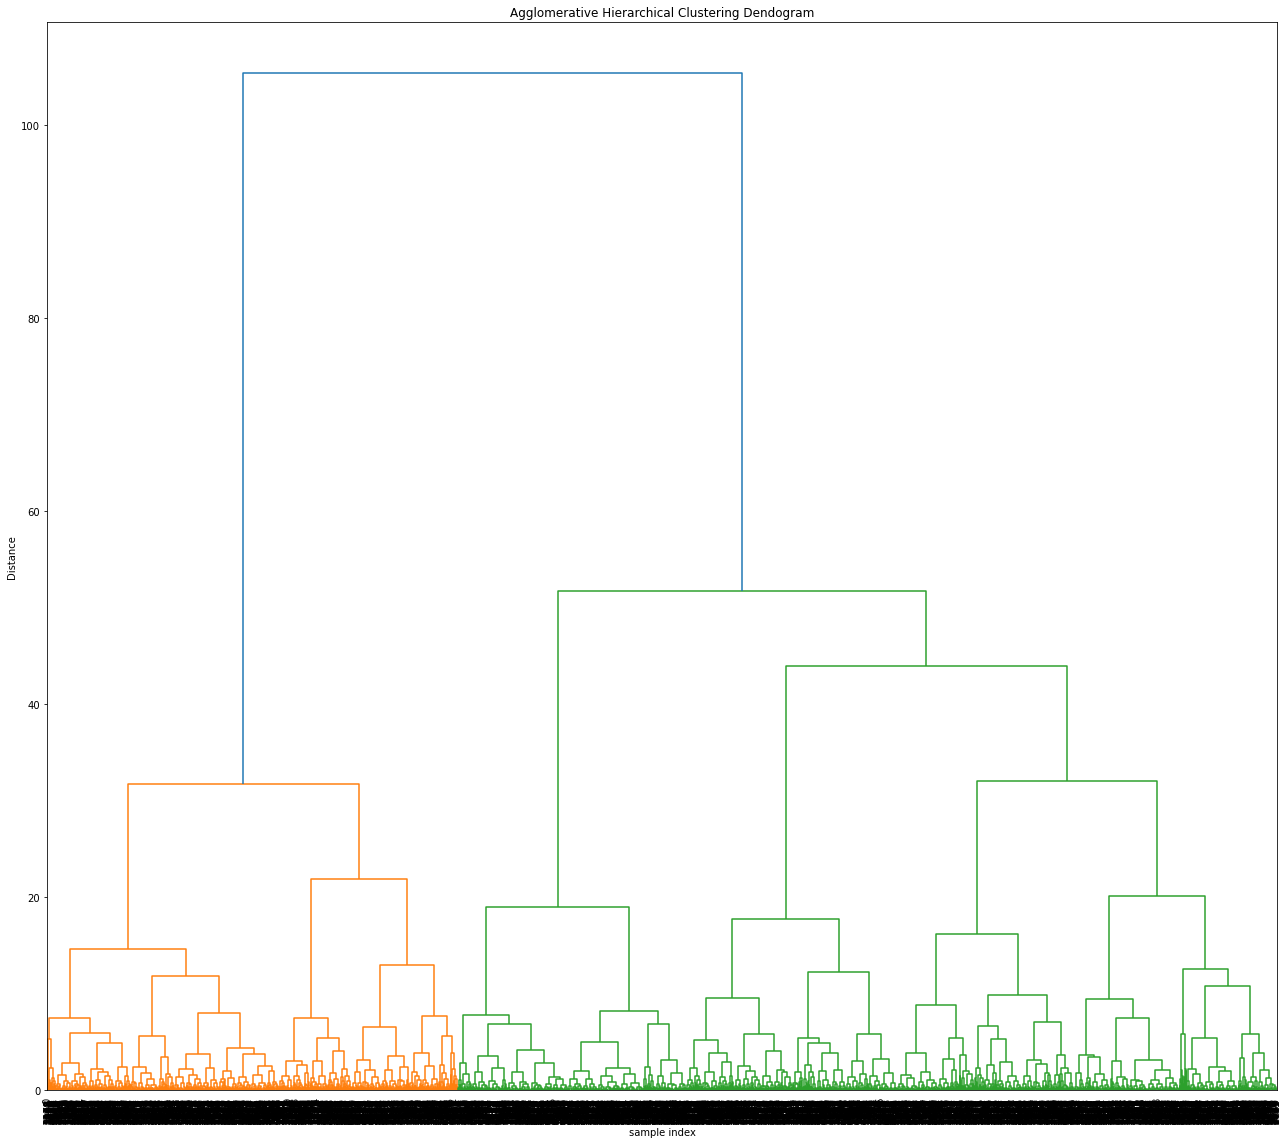

In [246]:
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist
plt.figure(figsize=(18, 16))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
Z = linkage(X, 'ward')
dendrogram(Z,leaf_rotation=90.0,p=25,color_threshold=80,leaf_font_size=10,truncate_mode='level')
plt.tight_layout()

In [256]:
X_df = pd.DataFrame(X, columns= X.columns)
X_df["group"] = rfm_data_pt['Aglo_Labels']

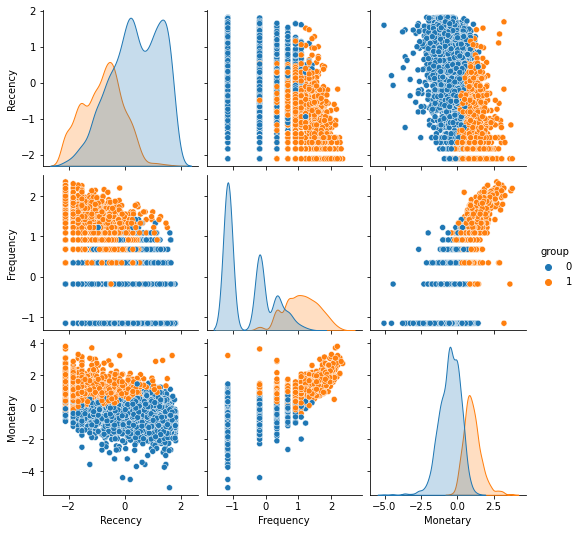

In [258]:
sns.pairplot(X_df, hue='group')

<AxesSubplot:xlabel='Aglo_Labels', ylabel='count'>

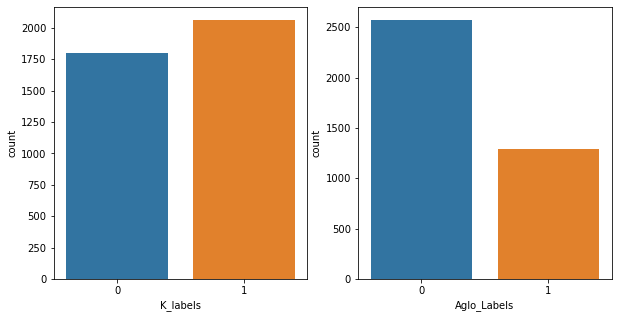

In [247]:
fig, ax = plt.subplots(1,2, figsize=(10,5))

sns.countplot(rfm_data_pt['K_labels'], ax=ax[0])
sns.countplot(rfm_data_pt['Aglo_Labels'], ax=ax[1])

# Applying PCA

In [259]:
from sklearn.decomposition import PCA

In [264]:
X = rfm_data_pt.iloc[:, 0:3]
X.head()

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,1.688654,-1.148776,3.213872
12747.0,-1.834272,1.489057,1.356792
12748.0,-2.108539,2.348790,2.715793
12749.0,-1.523331,0.912795,1.401631
12820.0,-1.657136,0.679616,0.306938


In [265]:
pca = PCA()
X = pca.fit_transform(X)

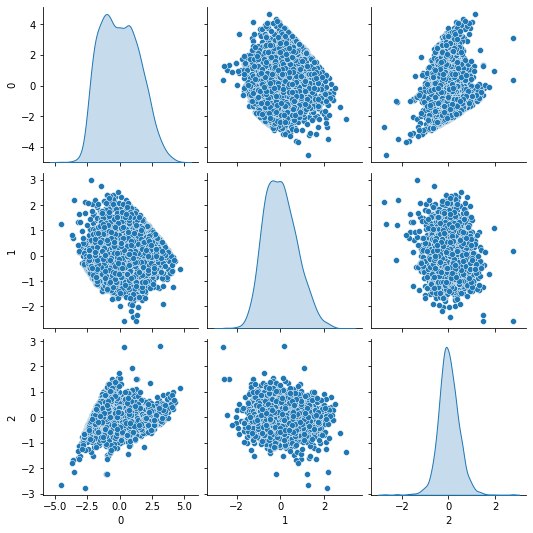

In [266]:
sns.pairplot(pd.DataFrame(X),diag_kind='kde')

<AxesSubplot:>

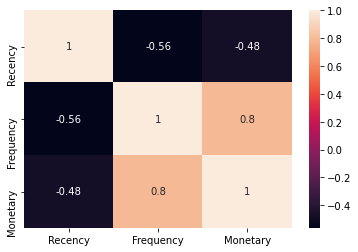

In [268]:
sns.heatmap(rfm_data_pt.iloc[:, 0:3].corr(), annot=True)

<AxesSubplot:>

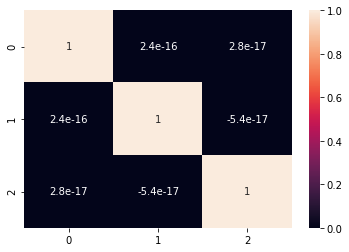

In [271]:
sns.heatmap(pd.DataFrame(X).corr(), annot=True)

In [275]:
pca_var = list(pca.explained_variance_ratio_)
pca_var

[0.7455345067967979, 0.18883853732701106, 0.06562695587619104]

In [273]:
from itertools import accumulate

In [279]:
list(accumulate(pca_var, lambda x,y : x+y ))

#Top 2 components are giving us most of the variance, we can consider PCA=2

[0.7455345067967979, 0.934373044123809, 1.0]

In [307]:
X = rfm_data_pt.iloc[:, 0:3]

pca = PCA(n_components=2)
pca_X = pca.fit_transform(X)

pca_df = pd.DataFrame(pca_X, columns=['PC1', 'PC2'])

In [298]:
pca.explained_variance_ratio_

array([0.74553451, 0.18883854])

In [299]:
pca.components_

array([[-0.51276637,  0.6172687 ,  0.59669926],
       [-0.84961015, -0.26492386, -0.45604599]])

In [300]:
#elbow method to find out no of clusters

cluster_errors = []

n_clusters = list(range(2,15))

for n in n_clusters:
    kmeans = KMeans(n_clusters=n, n_init=10)
    kmeans.fit(pca_df)
    cluster_errors.append(kmeans.inertia_)

df_elbow = pd.DataFrame({'No_cluster' : n_clusters, 'WCSS_errors' :cluster_errors })

In [301]:
df_elbow

,No_cluster,WCSS_errors
0,2,4710.823630
1,3,3453.438958
2,4,2570.269478
3,5,2053.354400
4,6,1688.573423
5,7,1494.965018
6,8,1344.718783
7,9,1208.758992
8,10,1095.785457
9,11,997.676808


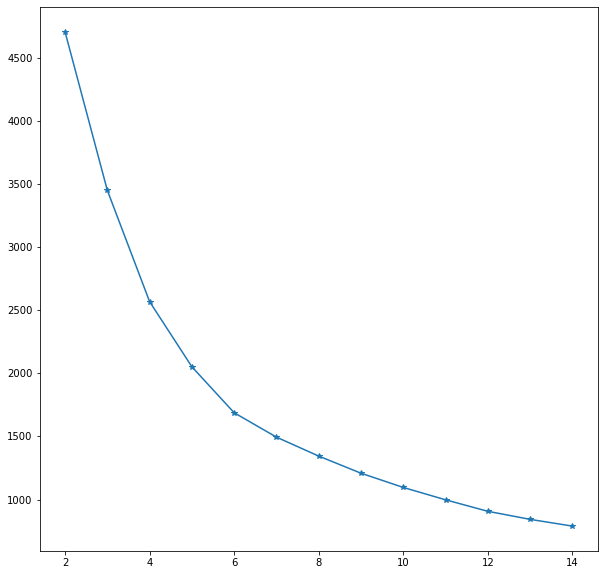

In [302]:
plt.figure(figsize=(10,10))
plt.plot(df_elbow['No_cluster'], df_elbow['WCSS_errors'], marker='*')

plt.show()

#we can consider n=3, we can recheck with sil

In [303]:
from sklearn.metrics import silhouette_score

In [304]:
#silhouette_score

sil_score = []

n_clusters = list(range(2,15))

for n in n_clusters:
    kmeans = KMeans(n_clusters=n, n_init=10)
    kmeans.fit(pca_df)
    labels = kmeans.labels_
    sil_score.append(silhouette_score(pca_df, labels ))

df_sil = pd.DataFrame({'No_cluster' : n_clusters, 'Silhouette_score' :sil_score })

In [305]:
df_sil

#we can consider n=2, silhouette_score is high for n=2

,No_cluster,Silhouette_score
0,2,0.467730
1,3,0.366389
2,4,0.379308
3,5,0.378920
4,6,0.381980
5,7,0.370994
6,8,0.365207
7,9,0.360479
8,10,0.339724
9,11,0.356459


In [306]:
#Clustering

kmeans = KMeans(n_clusters=2)
kmeans.fit(pca_df)

labels = kmeans.labels_

In [292]:
X1 = rfm_data_pt.iloc[:, 0:3]

X_df = pd.DataFrame(X1, columns= X1.columns)
X_df["group"] = labels

In [293]:
X_df.head()

,Recency,Frequency,Monetary,group
CustomerID,,,,
12346.0,1.688654,-1.148776,3.213872,0
12747.0,-1.834272,1.489057,1.356792,0
12748.0,-2.108539,2.348790,2.715793,0
12749.0,-1.523331,0.912795,1.401631,0
12820.0,-1.657136,0.679616,0.306938,0


In [308]:
pca_df['K_label'] = labels

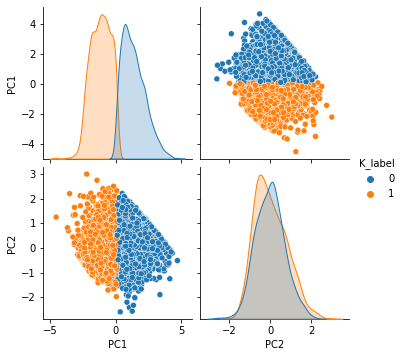

In [309]:
sns.pairplot(pca_df, hue='K_label')

In [310]:
model2 = AgglomerativeClustering(n_clusters=2, affinity='euclidean',  linkage='ward')
model2.fit(pca_X)

AgglomerativeClustering()

In [311]:
label = model2.labels_

In [312]:
pca_df['Aglo_label'] = label

<AxesSubplot:xlabel='PC1', ylabel='PC2'>

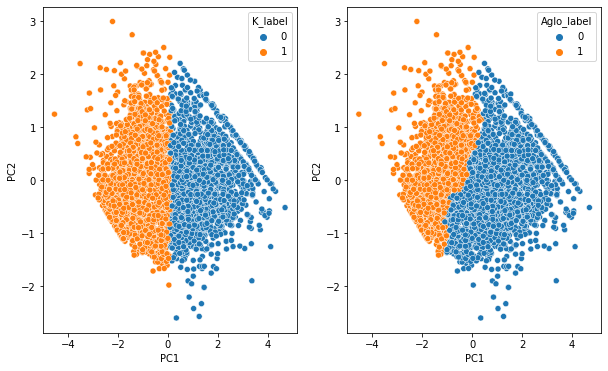

In [319]:
fig, ax = plt.subplots(1,2, figsize=(10,6))

sns.scatterplot(pca_df['PC1'], pca_df['PC2'], hue=pca_df['K_label'], ax=ax[0])

sns.scatterplot(pca_df['PC1'], pca_df['PC2'], hue=pca_df['Aglo_label']   ,ax=ax[1])

In [320]:
#We will consider Kmeans with PCA as out best clustering, the shape is clearly separated.

### Classification model, Random forest classification

In [326]:
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report

In [322]:
y = pca_df['K_label']
X = pca_df[['PC1', 'PC2']]

In [323]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [324]:
rfc = RandomForestClassifier()

rfc.fit(X_train, y_train)

RandomForestClassifier()

In [327]:
y_train_proba = rfc.predict_proba(X_train)
y_train_pred = rfc.predict(X_train)

y_test_proba = rfc.predict_proba(X_test)
y_test_pred = rfc.predict(X_test)

In [328]:
print('Classiifcation report for train data :')
print(classification_report(y_train, y_train_pred))

Classiifcation report for train data :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1249
           1       1.00      1.00      1.00      1454

    accuracy                           1.00      2703
   macro avg       1.00      1.00      1.00      2703
weighted avg       1.00      1.00      1.00      2703



In [329]:
print('Classiifcation report for test data :')
print(classification_report(y_test, y_test_pred))

Classiifcation report for test data :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       536
           1       1.00      1.00      1.00       623

    accuracy                           1.00      1159
   macro avg       1.00      1.00      1.00      1159
weighted avg       1.00      1.00      1.00      1159



In [330]:
# The labels formed by Kmeans clustering are being classified correctly by RandomForest model.